EDA 

Importo las librerias

In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud


Se cargan los Datos

In [3]:
import os

# Imprimir el directorio actual
print("Directorio actual:", os.getcwd())

# Listar los archivos en el directorio actual
print("Archivos en el directorio actual:", os.listdir(os.getcwd()))

Directorio actual: c:\Users\claud\OneDrive\Escritorio\Henry 1erPI-ML\EDA
Archivos en el directorio actual: ['EDA.ipynb']


In [4]:
df_movies = pd.read_parquet('../ETL/movies_cleaned.parquet')
df_credit_cast = pd.read_parquet('../ETL/credit_cast_cleaned.parquet')
df_credit_crew = pd.read_parquet('../ETL/credit_crew_cleaned.parquet')

Veremos la distribucion gral de los Datos

In [5]:
df_movies.describe()

,budget,id,revenue,runtime,vote_average,vote_count,release_year,return
count,4.144860e+05,414486.000000,4.144860e+05,414486.000000,414486.000000,414486.000000,414486.000000,4.144860e+05
mean,1.433554e+07,78683.546803,3.352771e+07,109.122301,5.927638,323.735993,1999.411278,1.013300e+03
std,3.210543e+07,105381.159389,1.099295e+08,31.329896,1.436062,870.056447,17.051815,1.053544e+05
min,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,9919.250000,0.000000e+00,93.000000,5.400000,8.000000,1995.000000,0.000000e+00
50%,0.000000e+00,33195.000000,0.000000e+00,105.000000,6.200000,35.000000,2004.000000,0.000000e+00
75%,1.200000e+07,88902.000000,7.829208e+06,123.000000,6.900000,197.000000,2010.000000,3.051507e-01
max,3.800000e+08,469172.000000,2.787965e+09,1256.000000,10.000000,14075.000000,2017.000000,1.239638e+07


Para una Analisis más prolijo redondeo los valores en decimales de 2 digitos

In [6]:
df_movies = df_movies.round(2)

In [7]:
df_movies.head(5)

,budget,id,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_year,return,genres_name,production_companies_name,production_countries_name,spoken_languages_name
0,30000000,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Toy Story,7.7,5415,1995,12.45,Animation,Pixar Animation Studios,United States of America,English
1,30000000,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Toy Story,7.7,5415,1995,12.45,Comedy,Pixar Animation Studios,United States of America,English
2,30000000,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Toy Story,7.7,5415,1995,12.45,Family,Pixar Animation Studios,United States of America,English
3,65000000,8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Jumanji,6.9,2413,1995,4.04,Adventure,TriStar Pictures,United States of America,English
4,65000000,8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Jumanji,6.9,2413,1995,4.04,Adventure,TriStar Pictures,United States of America,Français


Distribución de Películas por año

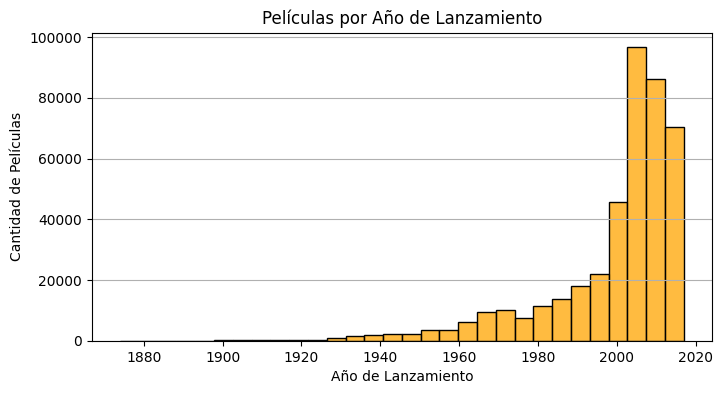

In [8]:
# Utilizamos un Histograma 
plt.figure(figsize=(8, 4))
sns.histplot(df_movies['release_year'], bins=30, kde=False, color='orange')
plt.title('Películas por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.grid(axis='y')
plt.show()


Desde 1920, se observa un crecimiento exponencial en la cantidad de películas lanzadas, alcanzando su punto máximo alrededor del año 2000. A partir de la década de 1980, la producción cinematográfica se incrementa significativamente. Sin embargo, después del 2000, se registra una notable disminución en la producción, probablemente debido a la transición hacia plataformas digitales. 

Como están distribuidas las calificaciones de las películas

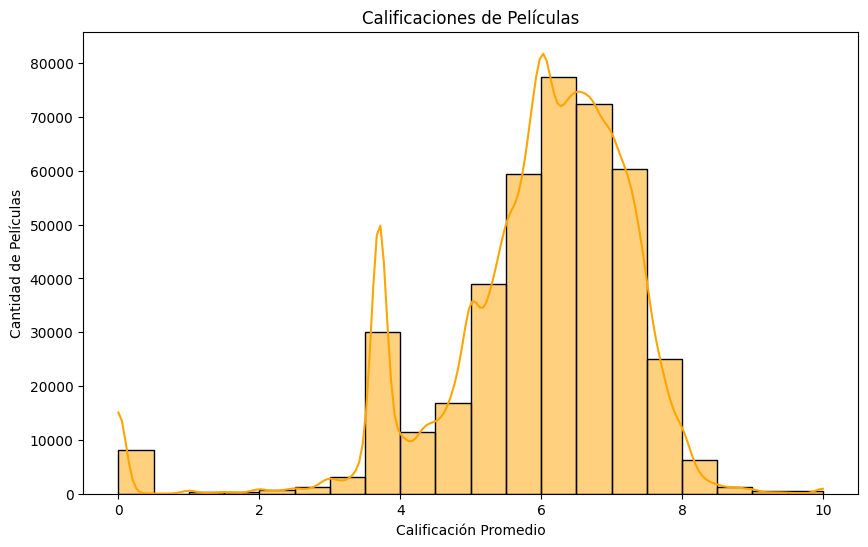

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df_movies['vote_average'], bins=20, kde=True, color='orange')
plt.title('Calificaciones de Películas')
plt.xlabel('Calificación Promedio')
plt.ylabel('Cantidad de Películas')
plt.show()

El gráfico muestra dos picos en las calificaciones de las películas, uno alrededor de 4 y otro en 6, lo que sugiere que algunas son valoradas más bajo y otras mejor. Hay un grupo de películas con calificaciones cercanas a 0, probablemente debido a malas críticas. La mayoría de las películas se sitúan entre 4 y 7, siendo percibidas como promedio o ligeramente buenas, mientras que las calificaciones muy altas son menos comunes.

Distribución de los generos

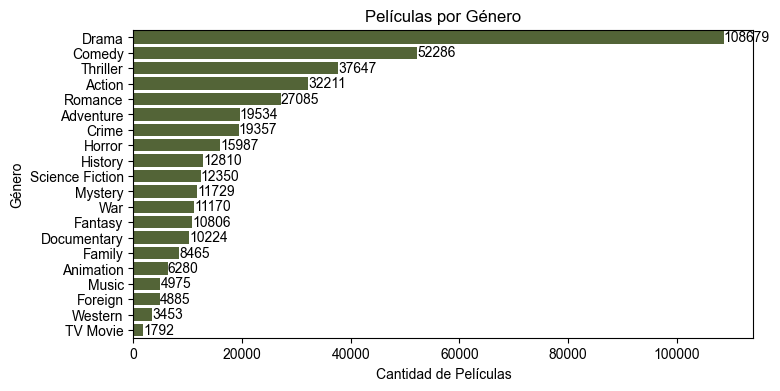

In [55]:
# Gráfico de barras con color verde musgo y etiquetas de datos
plt.figure(figsize=(8, 4))
# Color verde musgo personalizado
color_verde_musgo = '#556B2F'  # Código hexadecimal para verde musgo
# Crear gráfico de barras
ax = sns.countplot(y='genres_name', data=df_movies, order=df_movies['genres_name'].value_counts().index, color=color_verde_musgo)
# Añadir etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), va='center')
# Ajustes adicionales al gráfico
plt.title('Películas por Género')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Género')
# Mostrar gráfico
plt.show()

Se puede ver una clara preferencia hacia géneros dramáticos, cómicos y de acción. Esto puede estar relacionado con las tendencias en la industria del cine, donde estos géneros tienden a atraer grandes audiencias. Los géneros menos representados, como Western y TV Movie, parecen ser menos populares o más específicos, lo que explica su menor cantidad de películas producidas.

Nube de palabras de los Títulos

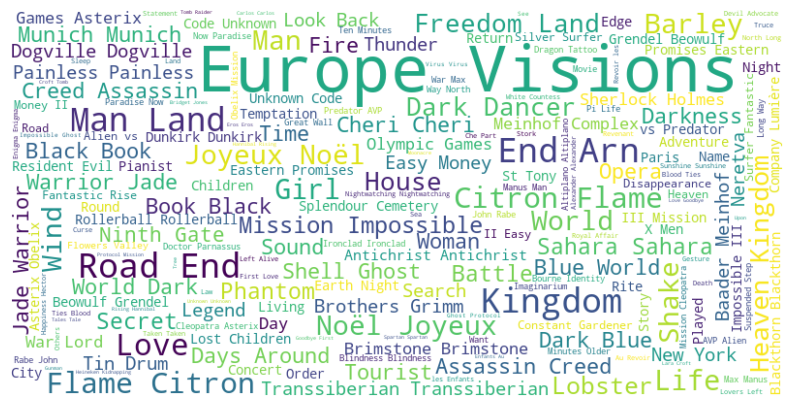

In [11]:
# Generar una nube de palabras para los títulos
text = ' '.join(df_movies['title'].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

La nube de palabras generada a partir de los títulos de las películas muestra que las palabras más frecuentes en los títulos son "Europe", "Visions", "Kingdom", y "World". Osea temas relacionados con lugares, fantasía o escenarios globales. Otras palabras como "Battle", "Road", "Fire", y "Girl" también destacan, se nota que los títulos de las películas tienden términos de acción, viajes, conflicto o personajes clave. 

Detección de Outliers  

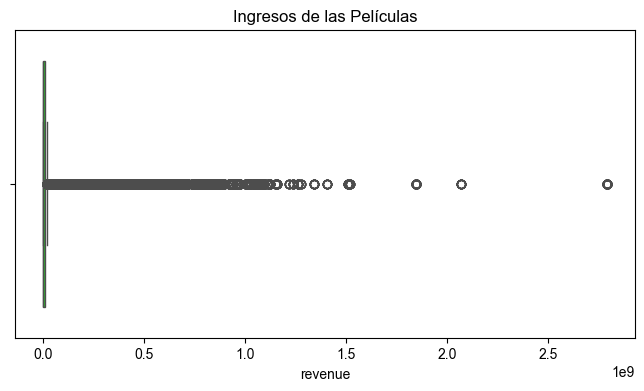

In [51]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_movies['revenue'], color='lime')
plt.title('Ingresos de las Películas')
plt.show()

El boxplot muestra una fuerte concentración de los datos hacia el extremo izquierdo, lo que indica que la mayoría de las películas generan ingresos bajos. Aunque, hay un número de outliers que representan películas con ingresos más altos, alcanzando hasta 2.5 mil millones de dólares. Estos outliers sugieren que una pequeña cantidad de películas logra generar ingresos muy altos, mientras que la mayoría se mantiene en un rango mucho más bajo. Se logra ver una gran disparidad en los.

Actores mas recurrentes

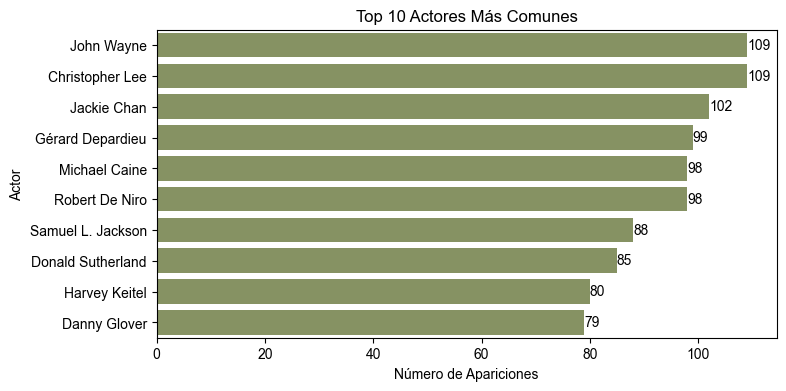

In [52]:
# Generar el gráfico de barras con verde musgo y etiquetas de datos
top_actors = df_credit_cast['cast_name'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_actors.values, y=top_actors.index, color='#8A9A5B')  # Color verde musgo
plt.title('Top 10 Actores Más Comunes')
plt.xlabel('Número de Apariciones')
plt.ylabel('Actor')
# Añadir etiquetas de datos en cada barra
for index, value in enumerate(top_actors.values):
    plt.text(value, index, str(value), va='center', ha='left', color='black')
plt.show()

Estos son los actores con más apariciones en películas. John Wayne y Christopher Lee encabezan la lista con 109 c/u, seguidos por Jackie Chan con 102. Gérard Depardieu, Michael Caine y Robert De Niro tienen apariciones cercanas a los 98 y 99. Estos actores se encuentran dentro del promedio de más de 80 películas en las que han participado. La presencia de actores como Samuel L. Jackson y Donald Sutherland refuerza la tendencia de actores que tienen una participación constante a lo largo del tiempo en múltiples géneros.

Top Ten de Directores

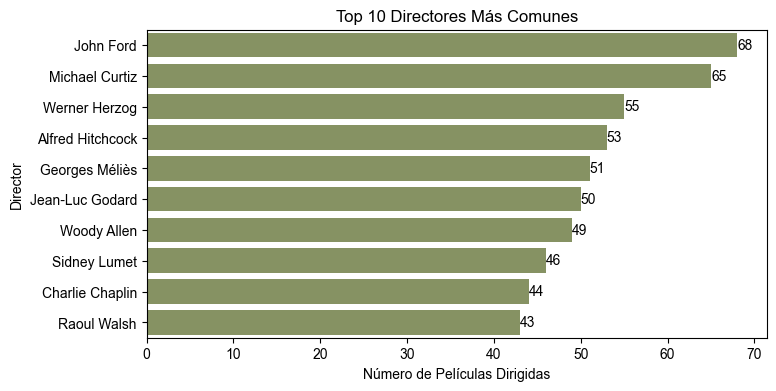

In [53]:
# Generar el gráfico de barras con verde musgo y etiquetas de datos
top_directors = df_credit_crew['crew_name'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_directors.values, y=top_directors.index, color='#8A9A5B')  # Color verde musgo
plt.title('Top 10 Directores Más Comunes')
plt.xlabel('Número de Películas Dirigidas')
plt.ylabel('Director')
# Añadir etiquetas de datos en cada barra
for index, value in enumerate(top_directors.values):
    plt.text(value, index, str(value), va='center', ha='left', color='black')
plt.show()

Los 10 directores más comunes en el data set. John Ford encabeza la lista con 68 películas dirigidas, seguido de Michael Curtiz con 65. Otros directores destacados incluyen a Werner Herzog y Alfred Hitchcock, con 55 y 53 películas respectivamente. También muestra a Georges Méliès, Jean-Luc Godard y Woody Allen, quienes han dirigido entre 43 y 51 películas cada uno. Este análisis destaca la frecuencia de algunos de los directores en la historia del cine.

Promedio de votos

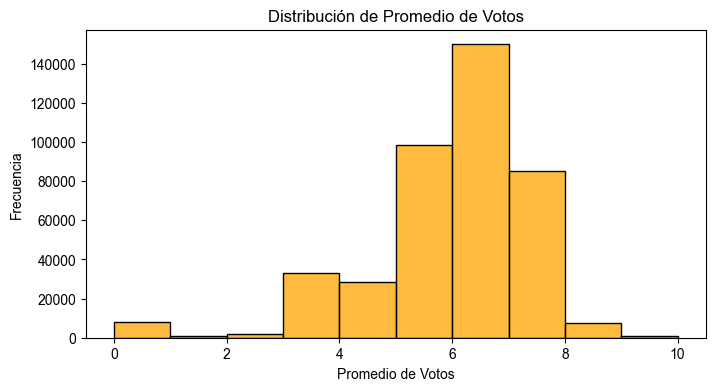

In [54]:
# Histograma de la columna 'vote_average'
plt.figure(figsize=(8, 4))
sns.histplot(df_movies['vote_average'], bins=10, color='orange')
plt.title('Distribución de Promedio de Votos')
plt.xlabel('Promedio de Votos')
plt.ylabel('Frecuencia')
plt.show()

El gráfico muestra la distribución del promedio de votos de las películas en el conjunto de datos. La mayoría de las películas tienen un promedio de votos entre 5 y 7, con un pico en la calificación de 6. Esto sugiere que las películas suelen recibir calificaciones moderadas, lo que indica que, en general, no son extremadamente sobresalientes ni muy mal evaluadas. Sin embargo, hay algunos valores atípicos en los extremos, con muy pocas películas que reciben calificaciones muy bajas o muy altas (cercanas a 0 y 10). También podemos decir que las calificaciones de las películas tienden a concentrarse en torno a la media, mientras que las evaluaciones extremas son menos frecuentes

Promedio de votos vs Revenue

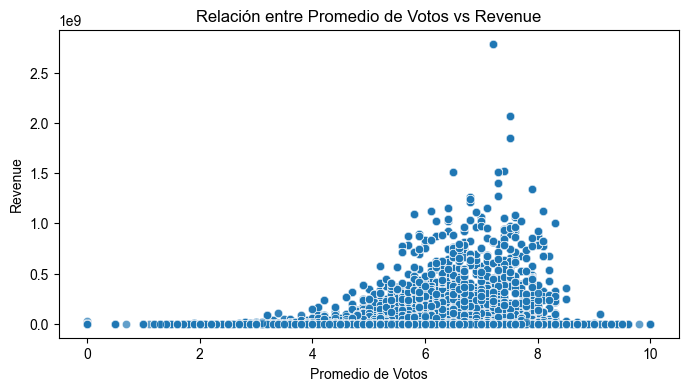

In [46]:
# Análisis bivariado entre revenue y promedio de votos
plt.figure(figsize=(8, 4))
sns.scatterplot(x='vote_average', y='revenue', data=df_movies, alpha=0.7)
plt.title('Relación entre Promedio de Votos vs Revenue')
plt.xlabel('Promedio de Votos')
plt.ylabel('Revenue')
plt.show()

Las películas con mayor promedio de votos tienden a generar mayores ingresos, aunque existen excepciones. Esto resalta la importancia de las críticas positivas en la industria del cine para atraer al público y generar ganancias. Sin embargo, otros factores también parecen influir en los ingresos, ya que no todas las películas con buenos promedios de votos garantizan ingresos altos.

Relación entre vote_average, revenue, y budget

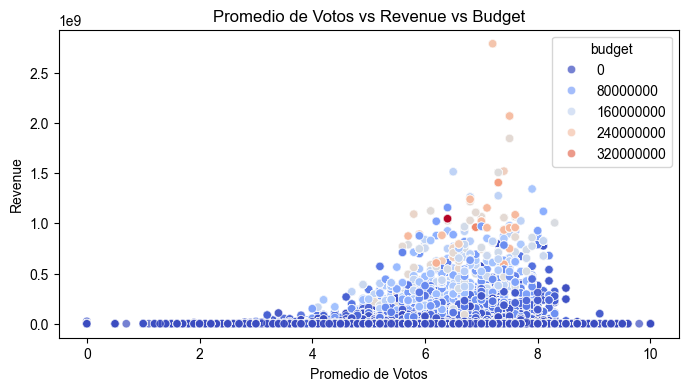

In [45]:
# Análisis multivariado entre revenue, promedio de votos y presupuesto
plt.figure(figsize=(8, 4))
sns.scatterplot(x='vote_average', y='revenue', hue='budget', data=df_movies, palette='coolwarm', alpha=0.7)
plt.title('Promedio de Votos vs Revenue vs Budget')
plt.xlabel('Promedio de Votos')
plt.ylabel('Revenue')
plt.show()

Se puede ver que el presupuesto influye en los ingresos, pero no de manera determinante. Las películas con mayor presupuesto tienden a generar mayores ingresos, pero el promedio de votos también juega un rol importante en el rendimiento financiero. No obstante, tanto el éxito crítico como el éxito financiero pueden depender de múltiples factores, y una gran inversión no siempre garantiza altos ingresos ni una mejor recepción del público.